In [146]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:
# Importing Warnings

import warnings
warnings.filterwarnings('ignore')

In [155]:
# Loading the dataset

data = pd.read_csv(r'C:\Users\Shashi\Model Building\Supervised Learning\Regression Model\Logistic Regression lasso_ridge\Datasets_LassoRidge\ToyotaCorolla.csv', encoding= 'unicode_escape')

In [156]:
# Checking the head of data

data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [157]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [159]:
# Checking the data types

data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [160]:
# Reordering the columns as we need 

# Price, Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, Weight.

data = data.iloc[:,[ 2 , 3 , 6 , 8 , 12 , 13 , 15 , 16 , 17]]

In [161]:
# Checking the dataset

data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Exploratory Data Analysis

### 1st Business Moment : Measures of Central Tendency
### Calculating the Mean, Median, Mode

In [162]:
data.mean()

Price            10730.824513
Age_08_04           55.947075
KM               68533.259749
HP                 101.502089
cc                1576.855850
Doors                4.033426
Gears                5.026462
Quarterly_Tax       87.122563
Weight            1072.459610
dtype: float64

In [163]:
data.median()

Price             9900.0
Age_08_04           61.0
KM               63389.5
HP                 110.0
cc                1600.0
Doors                4.0
Gears                5.0
Quarterly_Tax       85.0
Weight            1070.0
dtype: float64

In [164]:
data.mode()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,8950,68,36000,110,1600,5,5,85,1075


### 2nd Business Moment : Measures of Dispersion

### Calculating the Variance, Standard Deviation

In [165]:
data.var()

Price            1.315487e+07
Age_08_04        3.459596e+02
KM               1.406734e+09
HP               2.244327e+02
cc               1.801041e+05
Doors            9.075927e-01
Gears            3.553619e-02
Quarterly_Tax    1.691563e+03
Weight           2.771088e+03
dtype: float64

In [166]:
data.std()

Price             3626.964585
Age_08_04           18.599988
KM               37506.448872
HP                  14.981080
cc                 424.386770
Doors                0.952677
Gears                0.188510
Quarterly_Tax       41.128611
Weight              52.641120
dtype: float64

### 3rd Business Moment : Measures of Skewness

In [167]:
data.skew()

Price             1.703885
Age_08_04        -0.826702
KM                1.015912
HP                0.955836
cc               27.431793
Doors            -0.076395
Gears             2.283960
Quarterly_Tax     1.993834
Weight            3.108639
dtype: float64

### 4th Business Moment : Measures of Kurtosis

In [168]:
data.kurt()

Price              3.737781
Age_08_04         -0.076632
KM                 1.685057
HP                 8.836434
cc               930.711227
Doors             -1.874765
Gears             37.703476
Quarterly_Tax      4.298345
Weight            19.362901
dtype: float64

### Graphical Representation

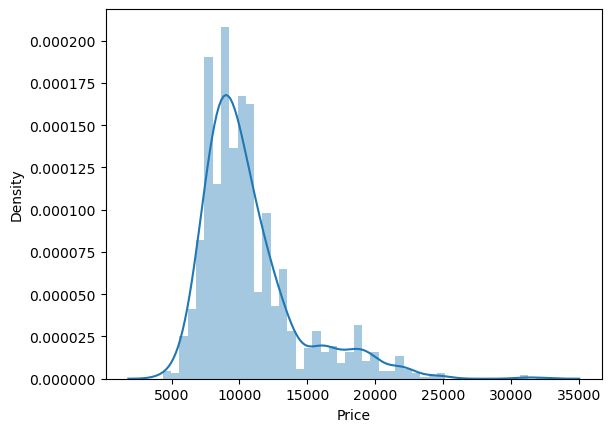

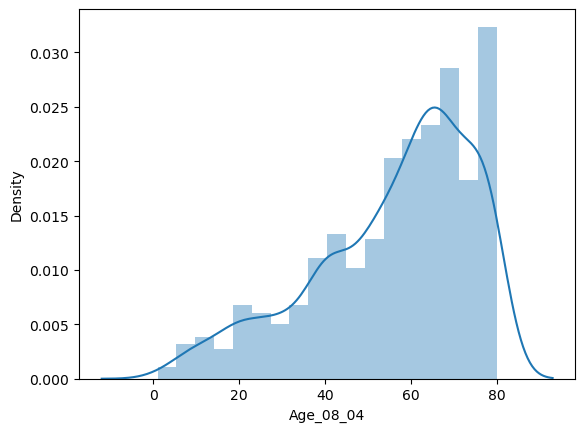

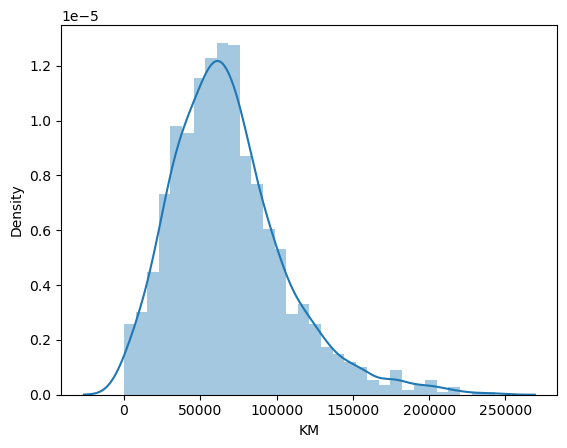

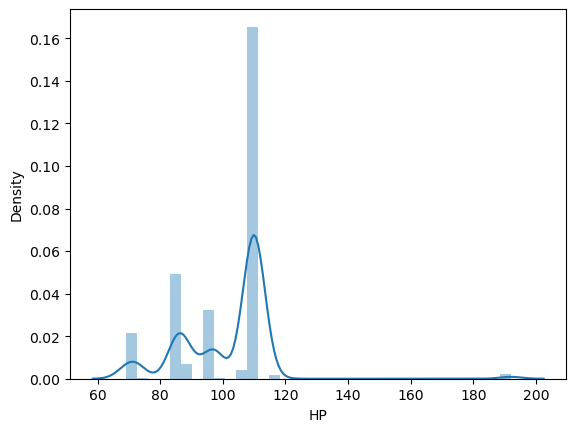

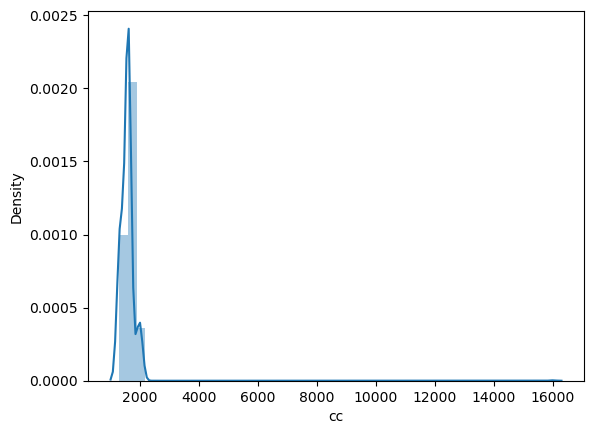

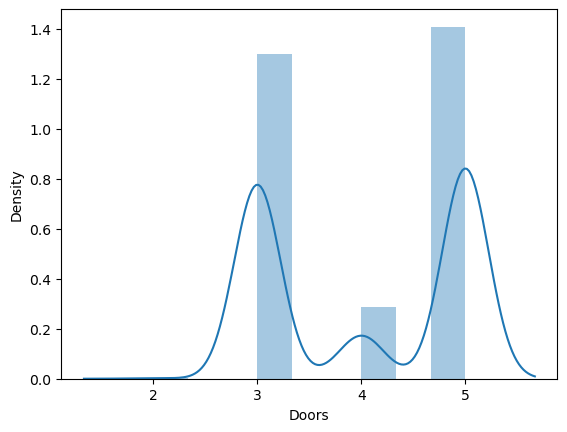

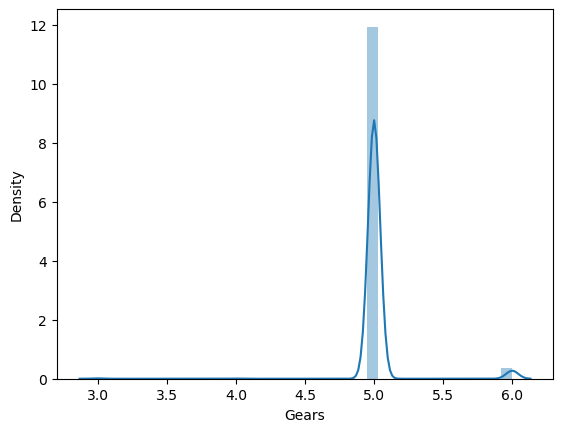

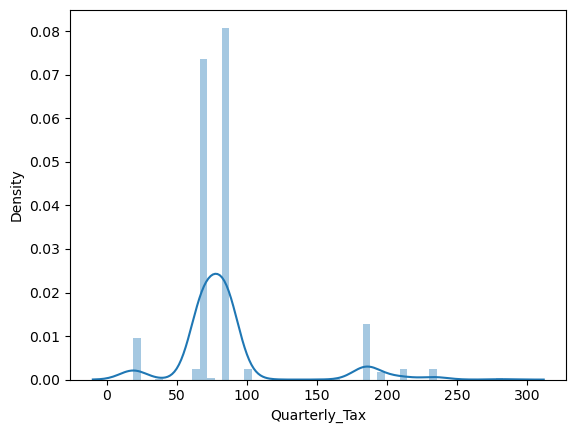

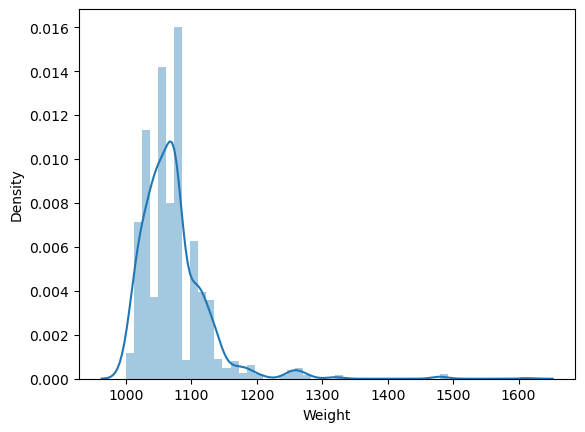

In [169]:
# Histo/Distance plot

for i, col, in enumerate(data.columns):
    plt.figure(i)
    sns.distplot(data[col])

{'whiskers': [<matplotlib.lines.Line2D at 0x217baceff10>,
 'caps': [<matplotlib.lines.Line2D at 0x217bacfe4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217bacefd60>],
 'medians': [<matplotlib.lines.Line2D at 0x217bacfea90>],
 'fliers': [<matplotlib.lines.Line2D at 0x217bacfed60>],
 'means': []}

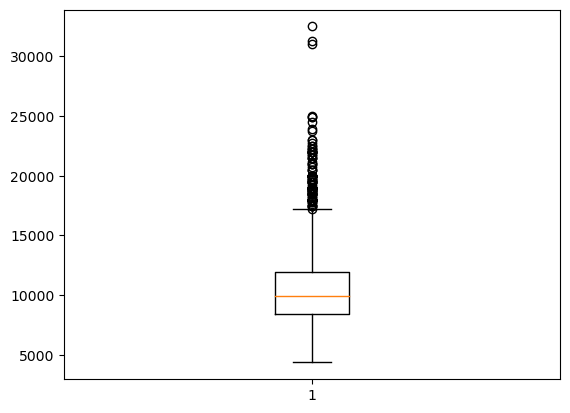

In [170]:
# Checking Boxplot to check Outliers

plt.boxplot(data['Price'])

In [171]:
# For Cleaning Outliers we use Winsorizer

from feature_engine.outliers import Winsorizer


<AxesSubplot:xlabel='Price'>

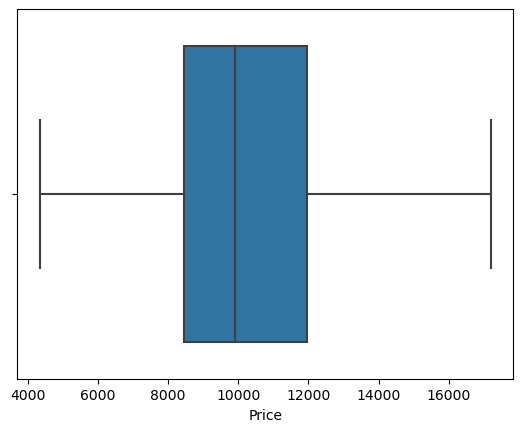

In [172]:
# Price column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                  variables = ('Price'))

data_iqr = winsor_iqr.fit_transform(data[['Price']])

sns.boxplot(data_iqr['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x217baec9340>,
 'caps': [<matplotlib.lines.Line2D at 0x217baec98e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217baec9190>],
 'medians': [<matplotlib.lines.Line2D at 0x217baec9e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x217baed8190>],
 'means': []}

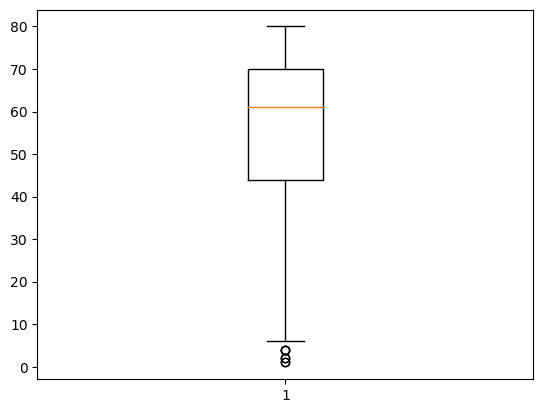

In [173]:
plt.boxplot(data['Age_08_04'])

<AxesSubplot:xlabel='Age_08_04'>

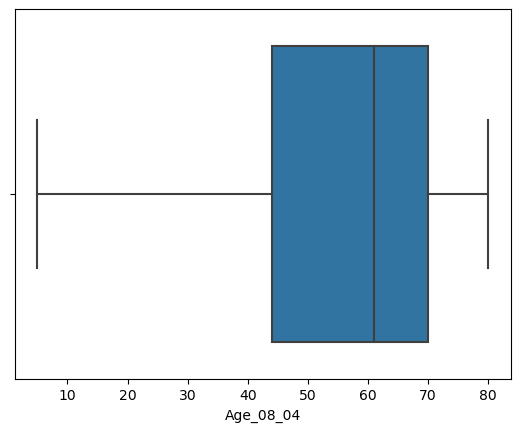

In [174]:
# Age_08_04 Column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                  variables = ('Age_08_04'))

data_iqr = winsor_iqr.fit_transform(data[['Age_08_04']])

sns.boxplot(data_iqr['Age_08_04'])

{'whiskers': [<matplotlib.lines.Line2D at 0x217baf55100>,
 'caps': [<matplotlib.lines.Line2D at 0x217baf556a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217baf48f10>],
 'medians': [<matplotlib.lines.Line2D at 0x217baf55c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x217baf55f10>],
 'means': []}

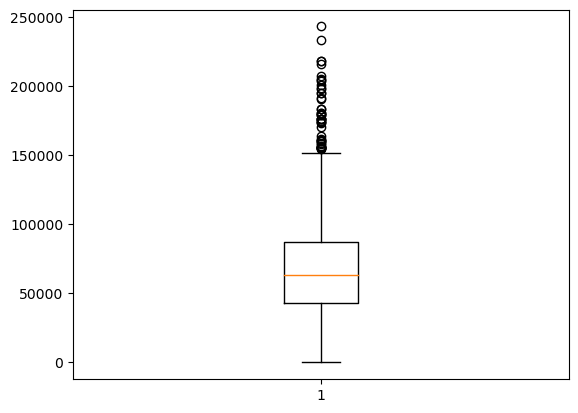

In [175]:
plt.boxplot(data['KM'])

<AxesSubplot:xlabel='KM'>

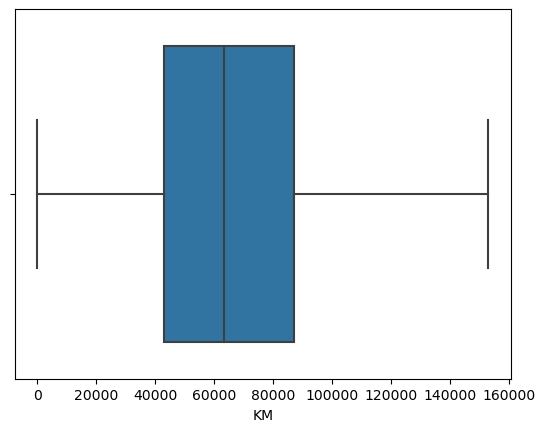

In [176]:
# KM Column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                  variables = ('KM'))

data_iqr = winsor_iqr.fit_transform(data[['KM']])

sns.boxplot(data_iqr['KM'])

{'whiskers': [<matplotlib.lines.Line2D at 0x217bb01a250>,
 'caps': [<matplotlib.lines.Line2D at 0x217bb01a820>,
 'boxes': [<matplotlib.lines.Line2D at 0x217baffedc0>],
 'medians': [<matplotlib.lines.Line2D at 0x217bb01adc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x217bb0290d0>],
 'means': []}

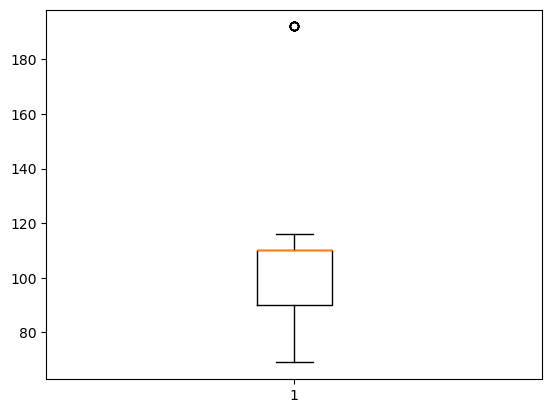

In [177]:
plt.boxplot(data['HP'])

<AxesSubplot:xlabel='HP'>

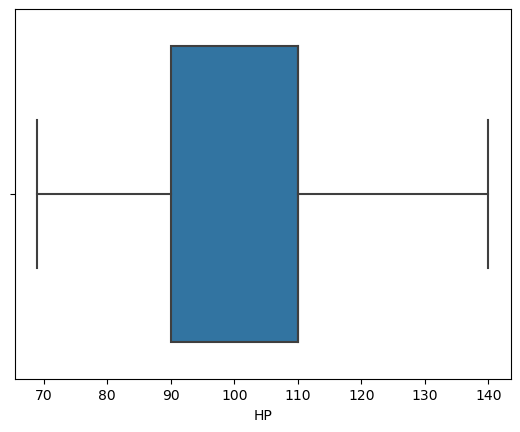

In [178]:
# HP Column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                  variables = ('HP'))

data_iqr = winsor_iqr.fit_transform(data[['HP']])

sns.boxplot(data_iqr['HP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x217bc0e6d30>,
 'caps': [<matplotlib.lines.Line2D at 0x217bc0f7310>,
 'boxes': [<matplotlib.lines.Line2D at 0x217bc0e6a60>],
 'medians': [<matplotlib.lines.Line2D at 0x217bc0f78b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x217bc0f7b80>],
 'means': []}

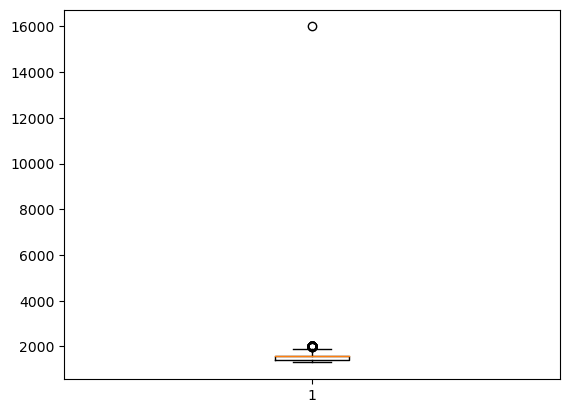

In [179]:
plt.boxplot(data['cc'])

<AxesSubplot:xlabel='cc'>

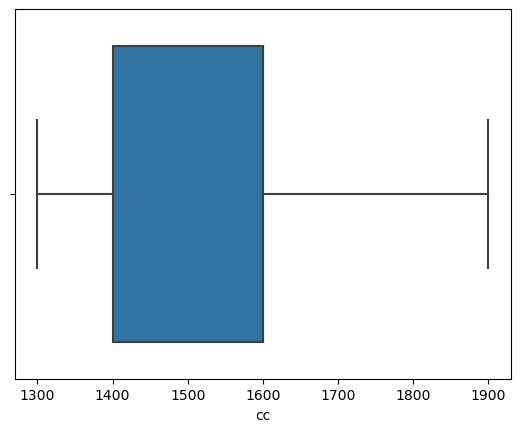

In [180]:
# cc Column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                  variables = ('cc'))

data_iqr = winsor_iqr.fit_transform(data[['cc']])

sns.boxplot(data_iqr['cc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x217bc1b1df0>,
 'caps': [<matplotlib.lines.Line2D at 0x217bc1bf3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217bc1b1b20>],
 'medians': [<matplotlib.lines.Line2D at 0x217bc1bf970>],
 'fliers': [<matplotlib.lines.Line2D at 0x217bc1bfc40>],
 'means': []}

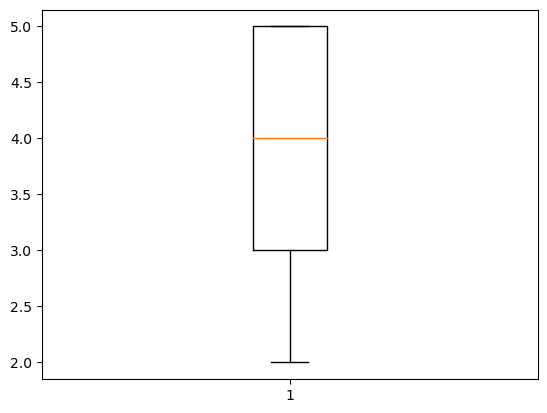

In [181]:
plt.boxplot(data['Doors'])

{'whiskers': [<matplotlib.lines.Line2D at 0x217bd1ef550>,
 'caps': [<matplotlib.lines.Line2D at 0x217bd1efaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217bd1ef280>],
 'medians': [<matplotlib.lines.Line2D at 0x217bd1fd0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x217bd1fd3a0>],
 'means': []}

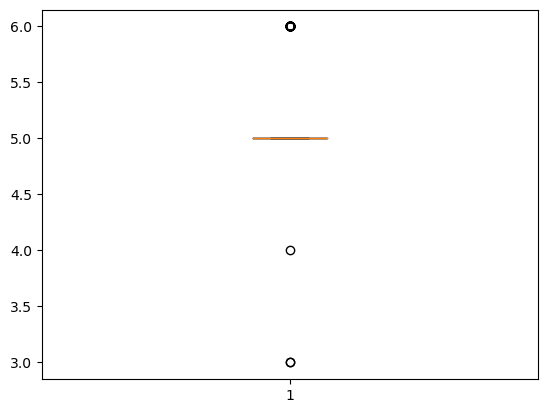

In [182]:
plt.boxplot(data['Gears'])

<AxesSubplot:xlabel='Gears'>

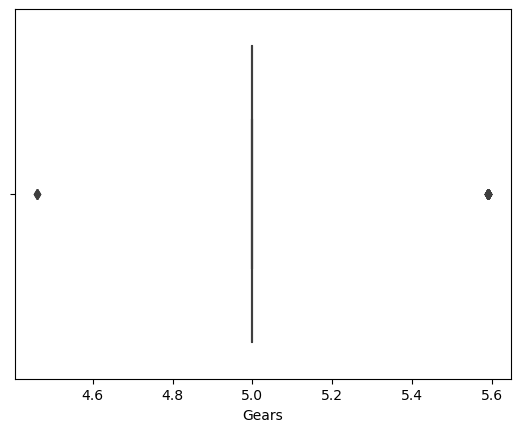

In [183]:
# Gears Column

winsor_gaussian = Winsorizer(capping_method = 'gaussian',
                              tail = 'both',
                                fold = 3,
                                  variables = ('Gears'))

data_gaussian = winsor_gaussian.fit_transform(data[['Gears']])

sns.boxplot(data_gaussian['Gears'])

#### IN Gears column the ouliers are present but iqr method is not working as well quantiles method so i used gaussian but ouliers percent so i am leaving it.

{'whiskers': [<matplotlib.lines.Line2D at 0x217bd274910>,
 'caps': [<matplotlib.lines.Line2D at 0x217bd274eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217bd274640>],
 'medians': [<matplotlib.lines.Line2D at 0x217bd282490>],
 'fliers': [<matplotlib.lines.Line2D at 0x217bd282760>],
 'means': []}

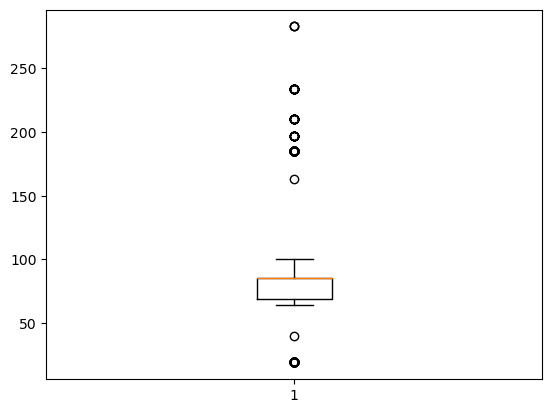

In [184]:
plt.boxplot(data['Quarterly_Tax'])

<AxesSubplot:xlabel='Quarterly_Tax'>

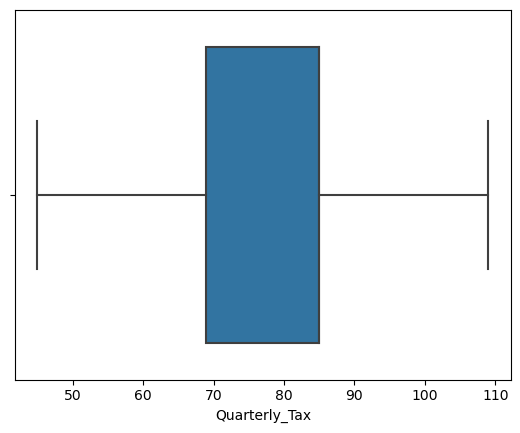

In [185]:
# Quarterly_Tax Column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                  variables = ('Quarterly_Tax'))

data_iqr = winsor_iqr.fit_transform(data[['Quarterly_Tax']])

sns.boxplot(data_iqr['Quarterly_Tax'])

{'whiskers': [<matplotlib.lines.Line2D at 0x217bd339940>,
 'caps': [<matplotlib.lines.Line2D at 0x217bd339ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217bd339670>],
 'medians': [<matplotlib.lines.Line2D at 0x217bd3474c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x217bd347790>],
 'means': []}

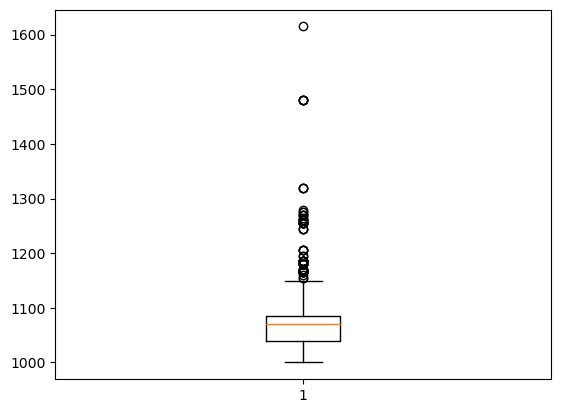

In [186]:
plt.boxplot(data['Weight'])

<AxesSubplot:xlabel='Weight'>

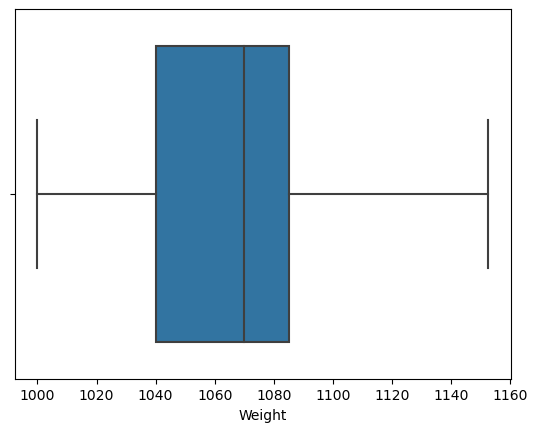

In [187]:
# Weight Column

winsor_iqr = Winsorizer(capping_method = 'iqr',
                              tail = 'both',
                                fold = 1.5,
                                  variables = ('Weight'))

data_iqr = winsor_iqr.fit_transform(data[['Weight']])

sns.boxplot(data_iqr['Weight'])

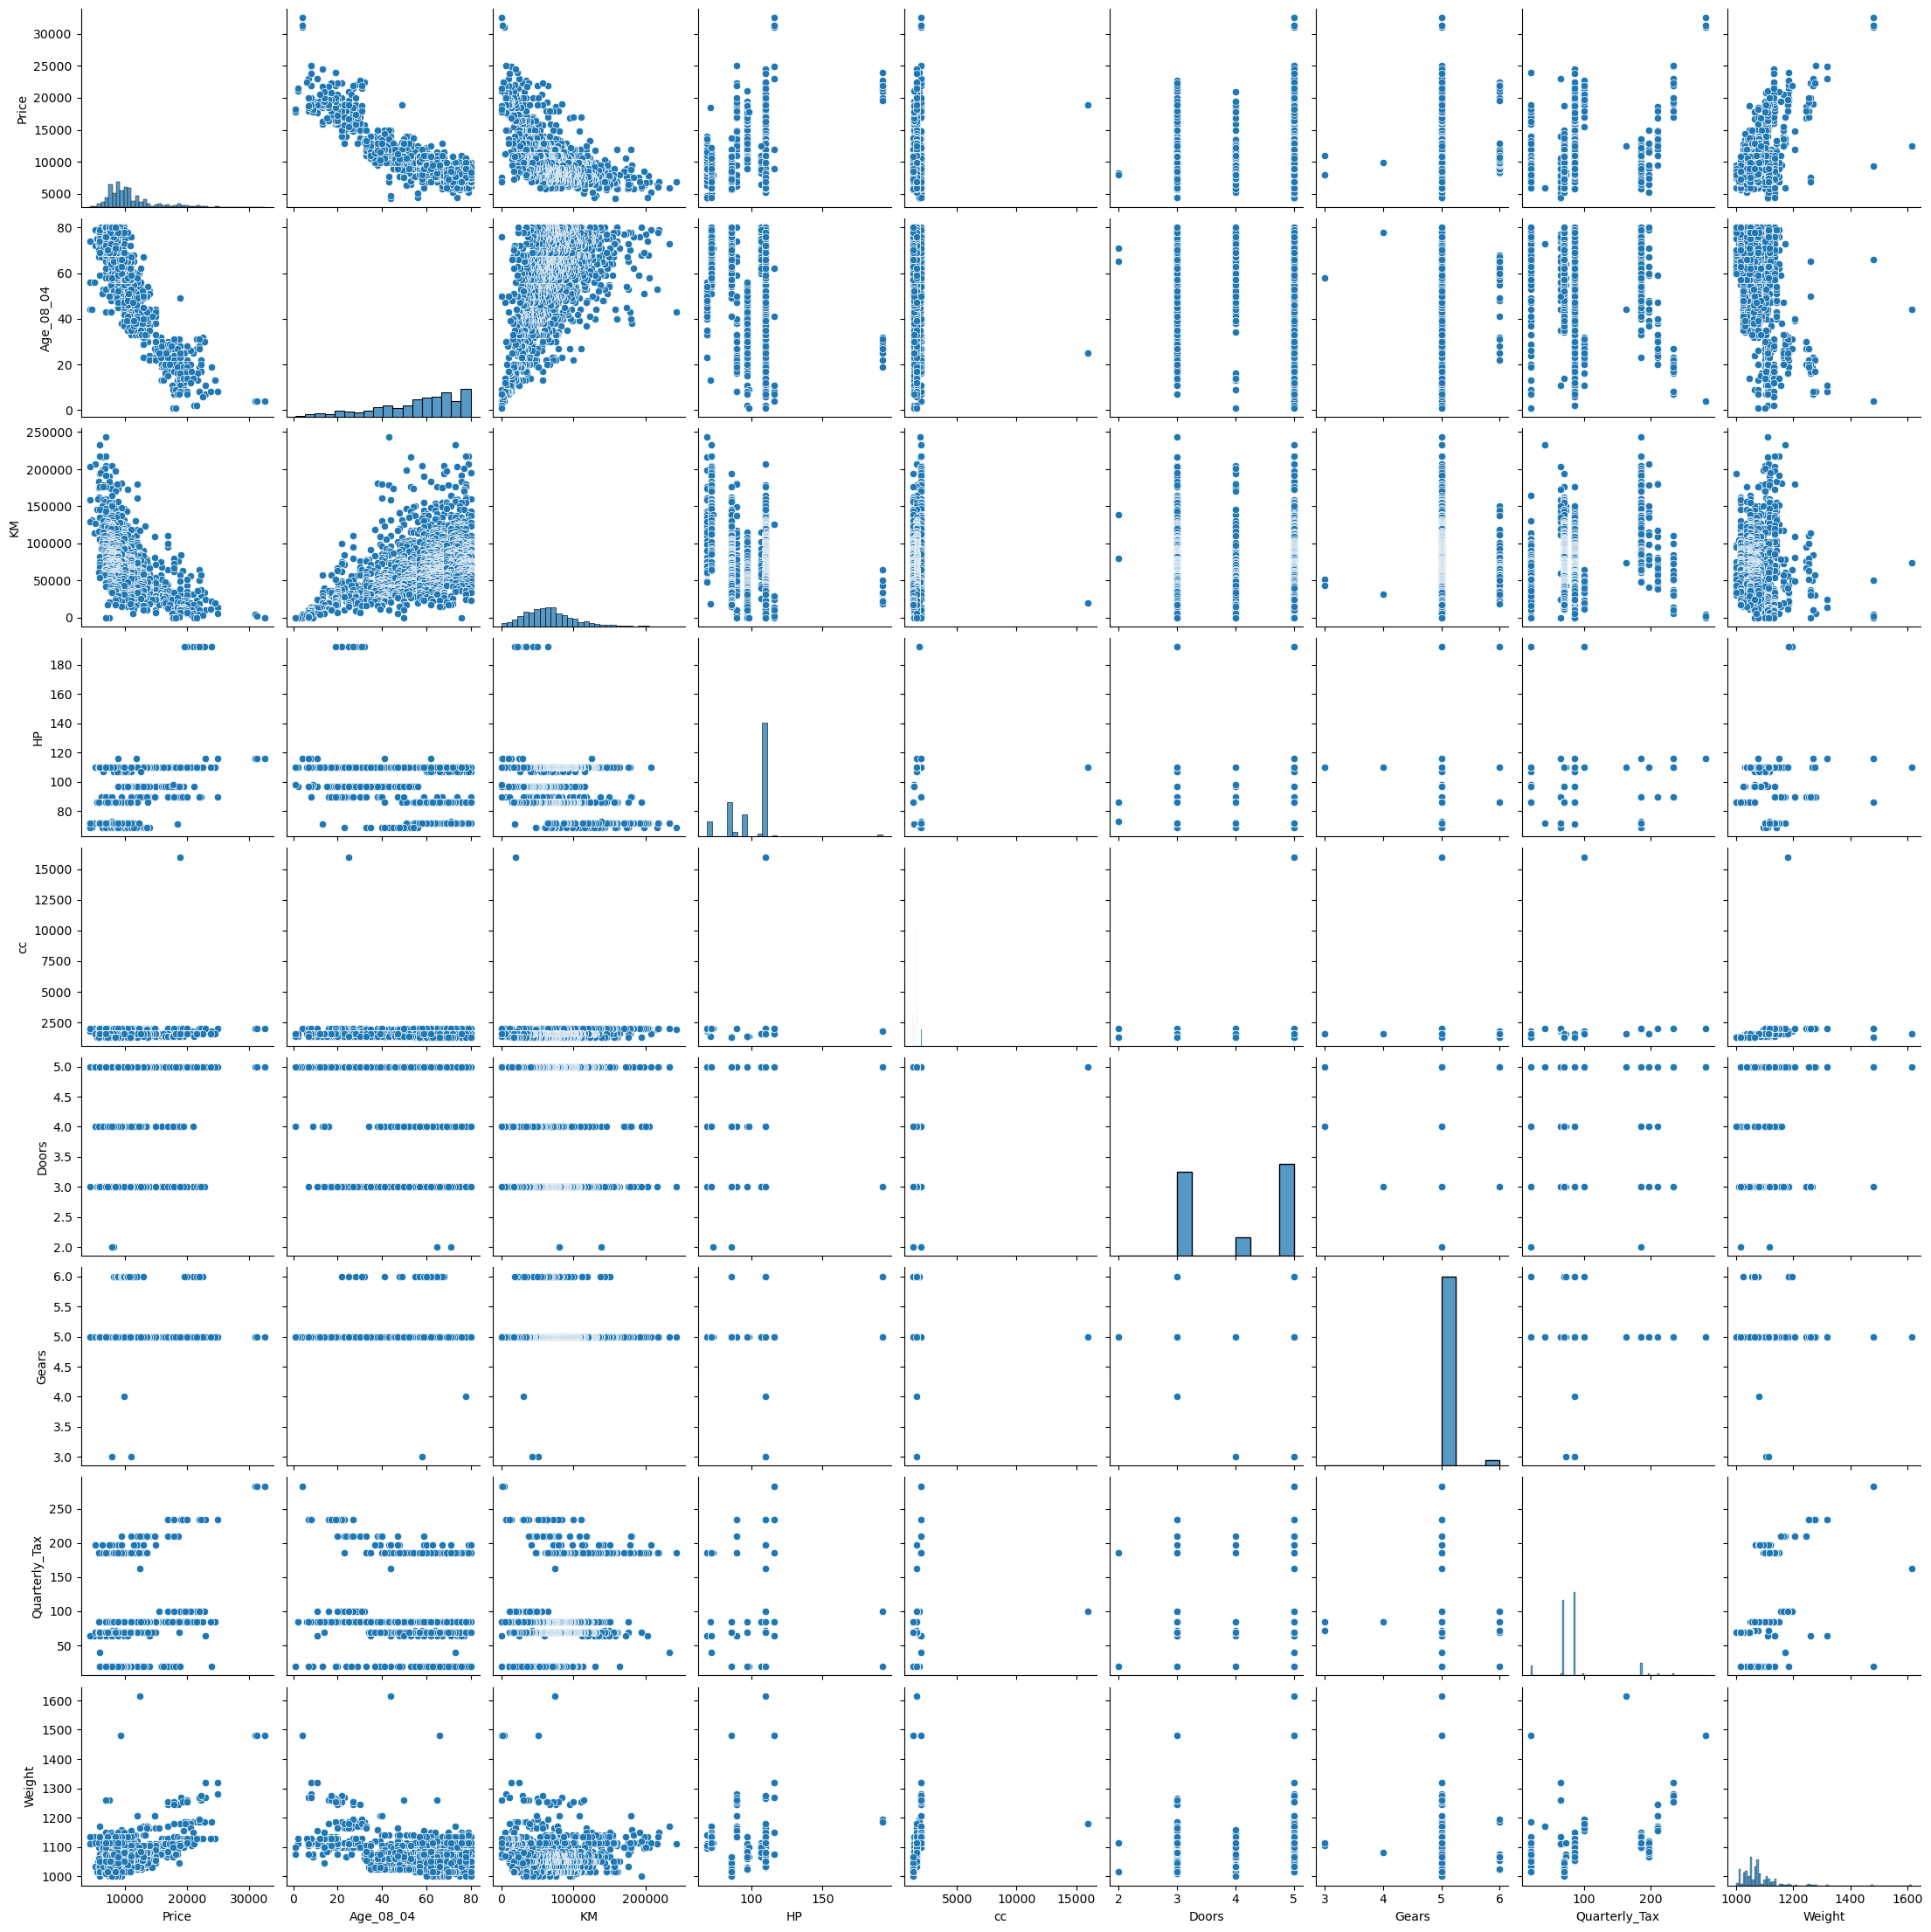

In [188]:
# Pairplot

sns.pairplot(data)

In [189]:
# Checking the duplicates

duplicates = data.duplicated()
sum(duplicates)

1

In [190]:
duplicates = data.drop_duplicates(keep = False)

In [191]:
duplicates.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1434, dtype: bool

In [192]:
# Checking the Zero Variance 

data.var() == 0

Price            False
Age_08_04        False
KM               False
HP               False
cc               False
Doors            False
Gears            False
Quarterly_Tax    False
Weight           False
dtype: bool

In [193]:
# Checking the Missing Values

data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [194]:
# Transformation 

import scipy.stats as stats
import pylab

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([ 4350,  4400,  4450, ..., 31000, 31275, 32500], dtype=int64)),
 (3352.8052168503777, 10730.824512534818, 0.9228631411878144))

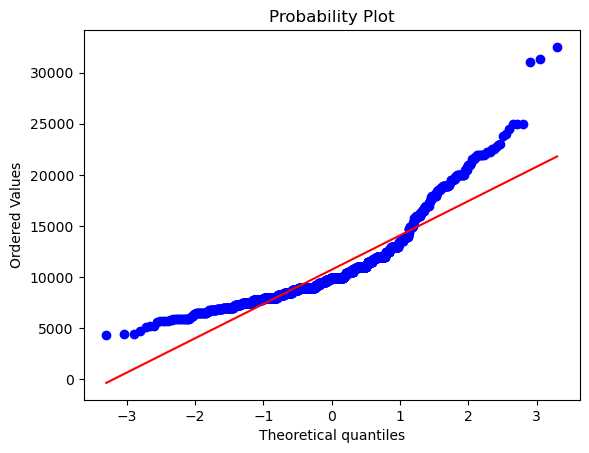

In [195]:
stats.probplot(data['Price'], dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([ 65.95452979,  66.33249581,  66.70832032, ..., 176.06816862,
         176.84739184, 180.27756377])),
 (15.420670176408237, 102.33165148383668, 0.9561501289198282))

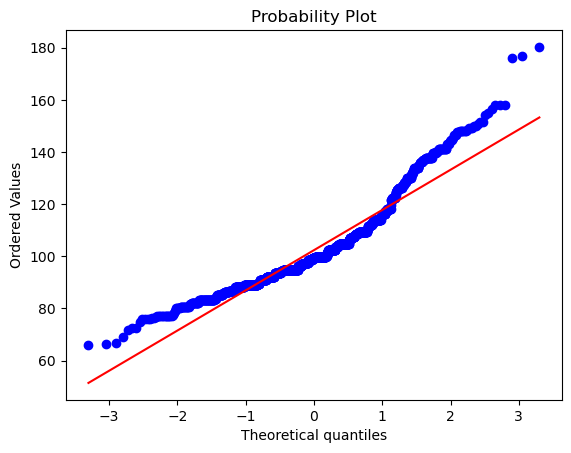

In [196]:
stats.probplot(np.sqrt(data['Price']), dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([ 1,  1,  2, ..., 80, 80, 80], dtype=int64)),
 (17.941816770758713, 55.94707520891365, 0.9629994460767825))

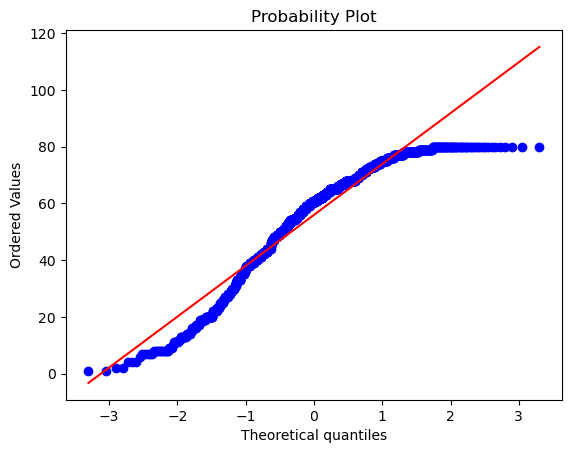

In [197]:
stats.probplot(data['Age_08_04'], dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([     1,      1,      1, ..., 218118, 232940, 243000], dtype=int64)),
 (36573.55359028179, 68533.25974930362, 0.9734945061615146))

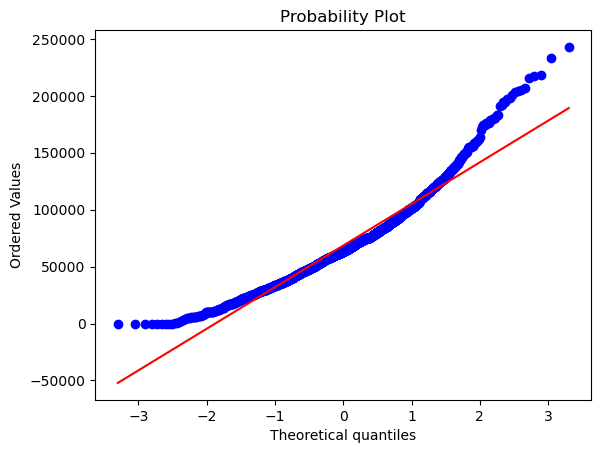

In [198]:
stats.probplot(data['KM'], dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([ 69,  69,  69, ..., 192, 192, 192], dtype=int64)),
 (12.603199952556045, 101.50208913649026, 0.839866009021448))

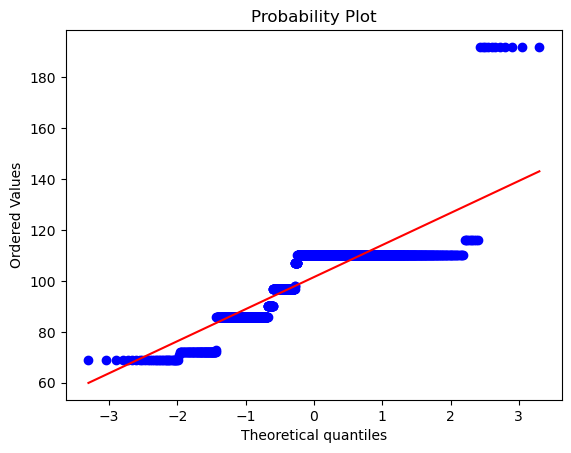

In [199]:
stats.probplot(data['HP'], dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([ 1300,  1300,  1300, ...,  2000,  2000, 16000], dtype=int64)),
 (199.95164930933728, 1576.8558495821726, 0.47036548547928697))

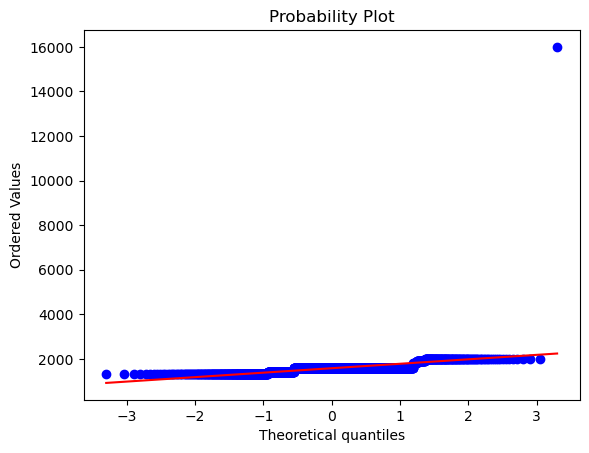

In [200]:
stats.probplot(data['cc'], dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([2, 2, 3, ..., 5, 5, 5], dtype=int64)),
 (0.7981203808285592, 4.0334261838440115, 0.8363637344727738))

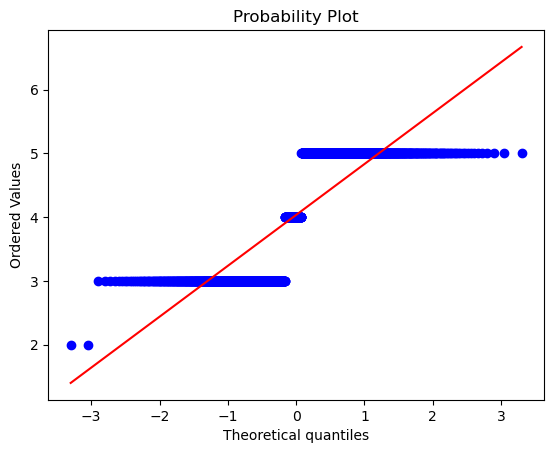

In [201]:
stats.probplot(data['Doors'], dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([3, 3, 4, ..., 6, 6, 6], dtype=int64)),
 (0.07882674824780625, 5.0264623955431755, 0.4174557887699718))

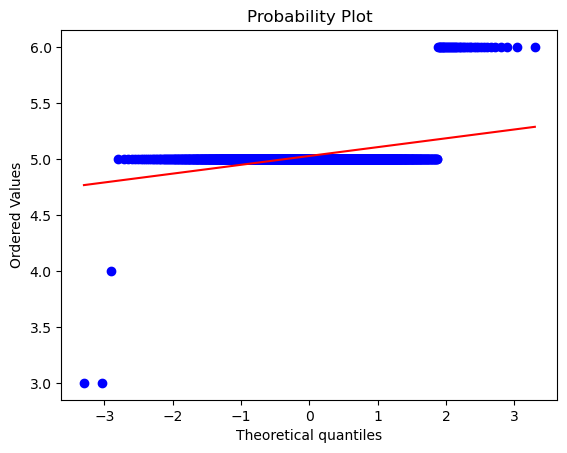

In [202]:
stats.probplot(data['Gears'], dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([ 19,  19,  19, ..., 283, 283, 283], dtype=int64)),
 (33.185834279222036, 87.12256267409471, 0.8055286404526995))

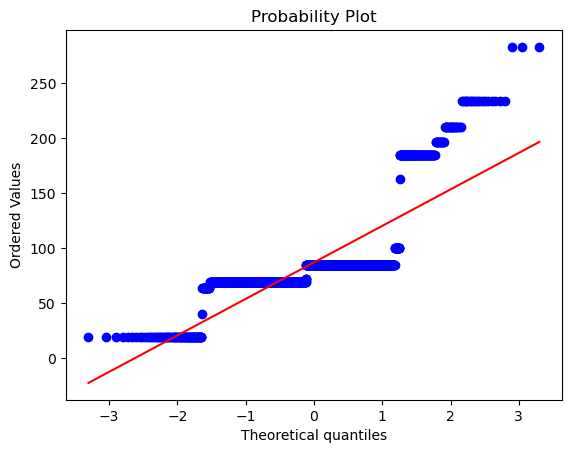

In [203]:
stats.probplot(data['Quarterly_Tax'], dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([2.66840165, 2.66840165, 2.66840165, ..., 6.56541443, 6.56541443,
         6.56541443])),
 (0.5384687363745212, 4.341191070152782, 0.8508108790293469))

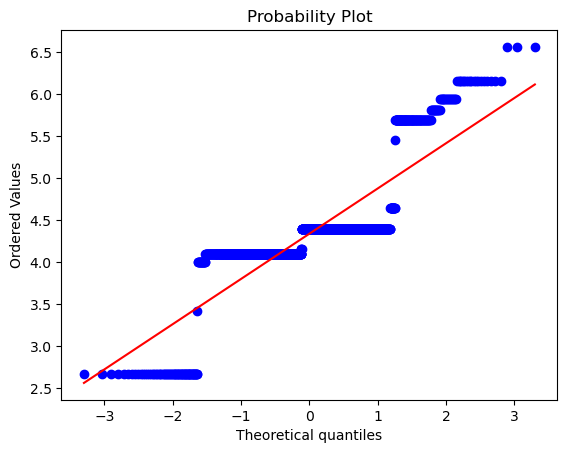

In [204]:
stats.probplot(np.cbrt(data['Quarterly_Tax']), dist = 'norm', plot = pylab)

((array([-3.30049245, -3.04294913, -2.89970643, ...,  2.89970643,
          3.04294913,  3.30049245]),
  array([1000, 1000, 1000, ..., 1480, 1480, 1615], dtype=int64)),
 (46.53230074360704, 1072.4596100278552, 0.8824735425615037))

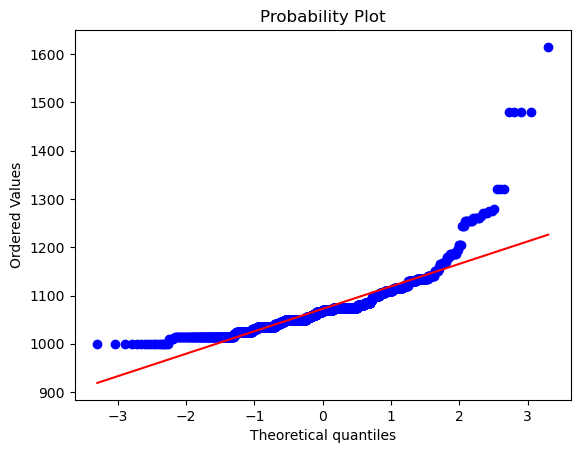

In [205]:
stats.probplot(data['Weight'], dist = 'norm', plot = pylab)

In [206]:
# Checking the describe

data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [207]:
# Checking the Correlation 

data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

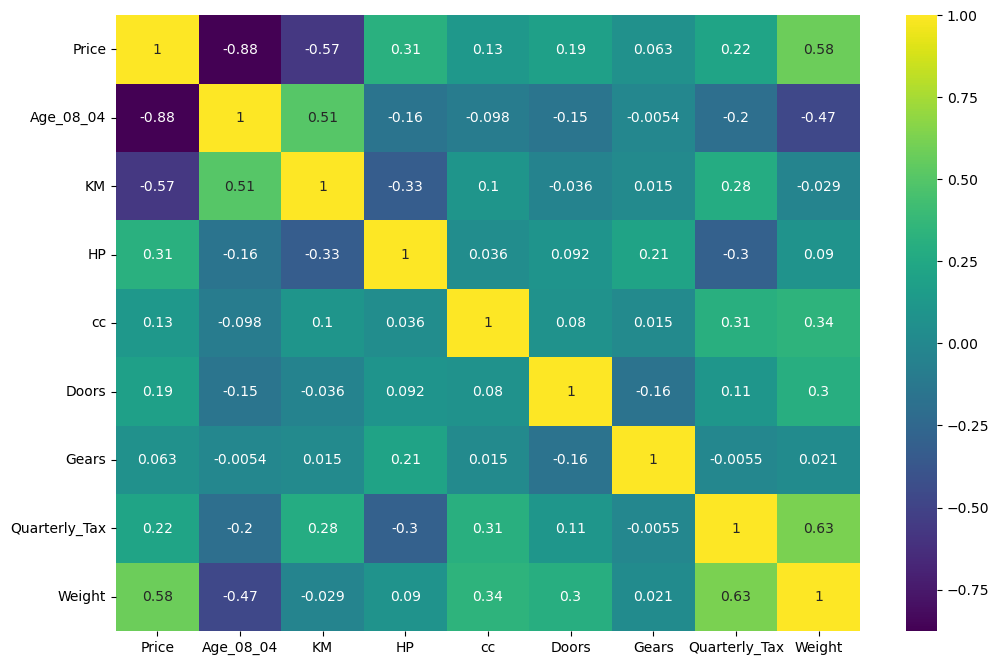

In [208]:
# Checking Heat Map

fig = plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)

In [209]:
# Segregating the data

X = data.drop(labels = ['Price'], axis = 1)
Y = data.Price

In [210]:
X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [211]:
Y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [213]:
# Importing the Train Test Split

from sklearn.model_selection import train_test_split

In [214]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [216]:
# Creating the Model

from sklearn.linear_model import LinearRegression

In [217]:
model = LinearRegression()
model.fit(x_train, y_train)

# Checking the score for training variables

model.score(X, Y)

1.0

In [227]:
model.score(x_train, y_train)

1.0

In [228]:
model.score(x_test, y_test)

1.0

In [218]:
y_pred = model.predict(x_test)

In [222]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [223]:
x_pred = model.predict(x_train)
x_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [219]:
# Importing Confusion matrix and accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score

In [220]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[431]]


1.0

In [221]:
## K-fold cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)
print(score)
print(score.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


### Result : Here The Training and Testing results are preety good as same, concluding this model is Right fit.